In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"F:\Dataset\CSV\Digit Recognition\train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [4]:
X=df.drop('label',axis=1)
y=df['label']

In [5]:
X=X/255.0


In [6]:

X = X.values.reshape(-1, 28, 28, 1)

In [7]:
no_image=len(X)
no_image

42000

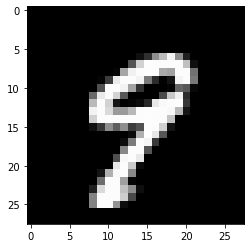

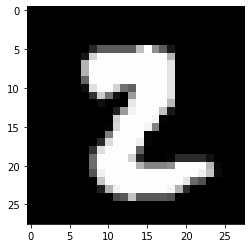

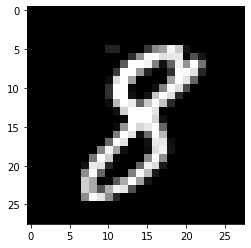

In [8]:
plt.imshow(X[11,:].reshape(28,28),cmap="gray")
plt.show()
plt.imshow(X[16,:].reshape(28,28),cmap="gray")
plt.show()
plt.imshow(X[20,:].reshape(28,28),cmap="gray")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size =0.2,random_state=0)

In [10]:
from tensorflow import keras

In [11]:
#Label Encoading

y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

# Modeling

In [13]:
# Initialize the CNN

from keras.models import Sequential

classfier=Sequential()

### 1. Convolution

In [14]:
from keras.layers import Conv2D
classfier.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[28,28,1]))

### 2. Pooling

In [16]:
from keras.layers import MaxPooling2D
classfier.add(MaxPooling2D(pool_size=2,strides=2))

In [17]:
### Add 2nd Convolution layer
classfier.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
classfier.add(MaxPooling2D(pool_size=2,strides=2))

# 3. Flattening

In [19]:
from keras.layers import Flatten
classfier.add(Flatten())

### 4. full Connection

In [22]:
from keras.layers import Dense
classfier.add(Dense(units=128,activation='relu'))
classfier.add(Dense(units=10,activation='softmax'))

## Compile The CNN

In [23]:
classfier.compile(optimizer = "Adam", loss = "CategoricalCrossentropy", metrics = "accuracy")

# Training The Model

In [25]:
classfier.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=25)

Epoch 1/25
1050/1050 [==============================] - 33s 29ms/step - loss: 0.1891 - accuracy: 0.9438 - val_loss: 0.0708 - val_accuracy: 0.9781
Epoch 2/25
1050/1050 [==============================] - 28s 27ms/step - loss: 0.0558 - accuracy: 0.9832 - val_loss: 0.0557 - val_accuracy: 0.9829
Epoch 3/25
1050/1050 [==============================] - 27s 26ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0543 - val_accuracy: 0.9839
Epoch 4/25
1050/1050 [==============================] - 28s 27ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0508 - val_accuracy: 0.9846
Epoch 5/25
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0412 - val_accuracy: 0.9886
Epoch 6/25
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0186 - accuracy: 0.9941 - val_loss: 0.0459 - val_accuracy: 0.9873
Epoch 7/25
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0449 -

In [27]:
predictions = classfier.predict(X_test).argmax(axis=1)

263/263 [==============================] - 2s 7ms/step


In [28]:
predictions

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

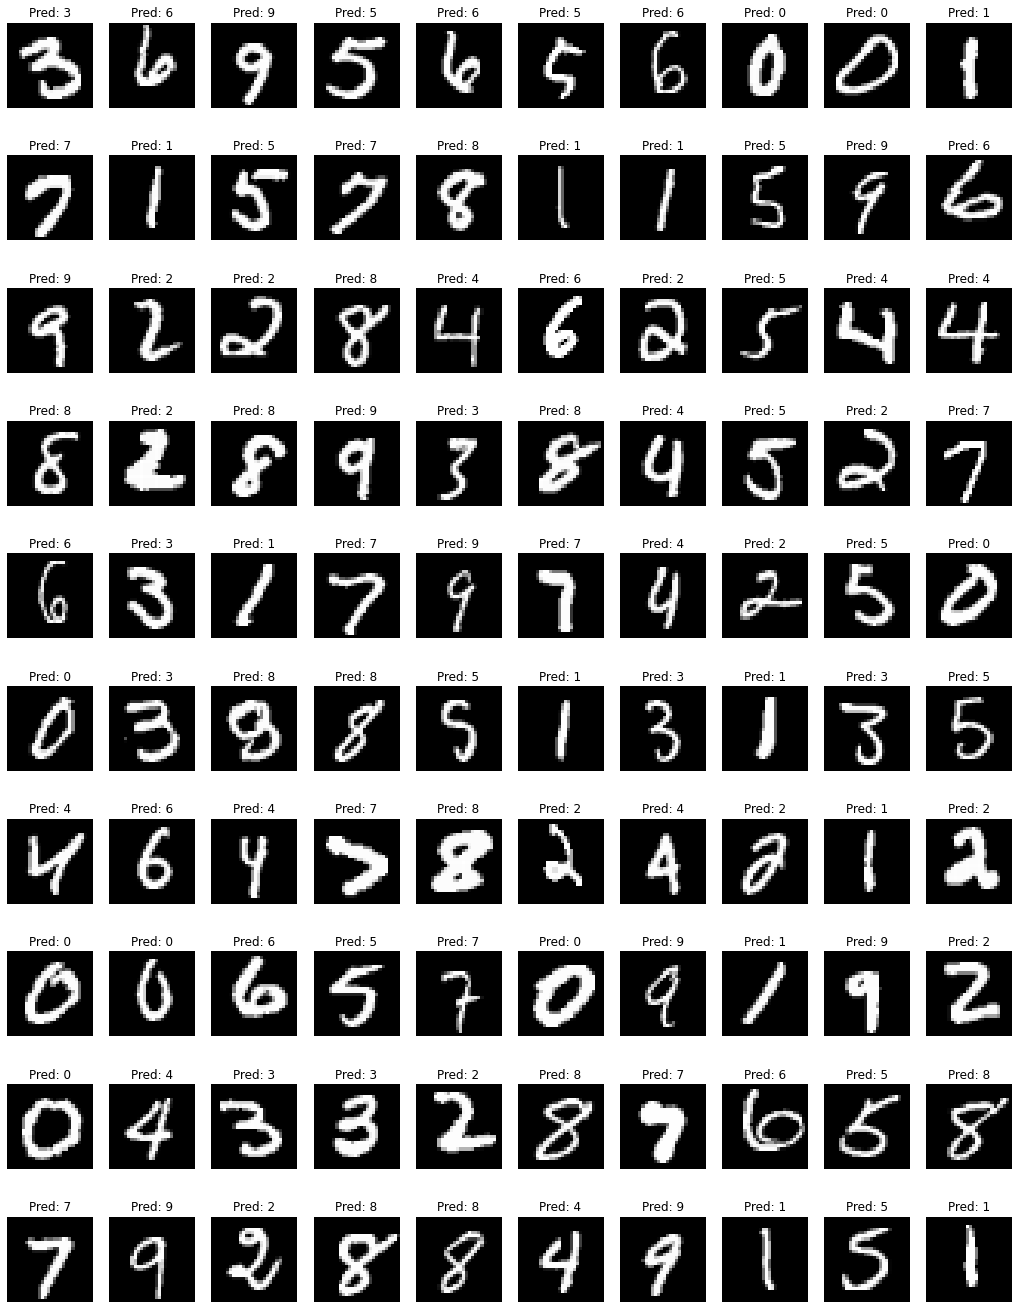

In [29]:
plt.figure(figsize=(18, 24))

for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {predictions[i]}")
    plt.axis('off')

In [30]:
import pickle

In [31]:
pickle.dump(classfier,open("digitRecognition.pkl","wb"))

INFO:tensorflow:Assets written to: ram://d5abc7c8-7364-4e15-99c8-c23174134bd8/assets


INFO:tensorflow:Assets written to: ram://d5abc7c8-7364-4e15-99c8-c23174134bd8/assets


In [32]:
df1=pd.read_csv(r"F:\Dataset\CSV\Digit Recognition\test.csv")
df1

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X1=df1/255.0

In [34]:
X1 = X1.values.reshape(-1, 28, 28, 1)

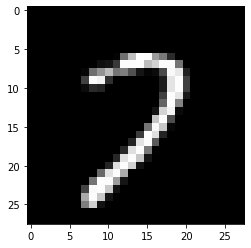

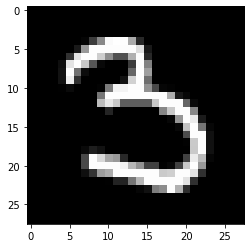

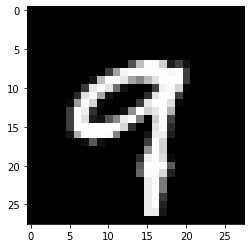

In [35]:
plt.imshow(X1[11,:].reshape(28,28),cmap="gray")
plt.show()
plt.imshow(X1[16,:].reshape(28,28),cmap="gray")
plt.show()
plt.imshow(X1[20,:].reshape(28,28),cmap="gray")
plt.show()

In [36]:
test_predictions = classfier.predict(X1).argmax(axis=1)

875/875 [==============================] - 7s 8ms/step


In [37]:
test_predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

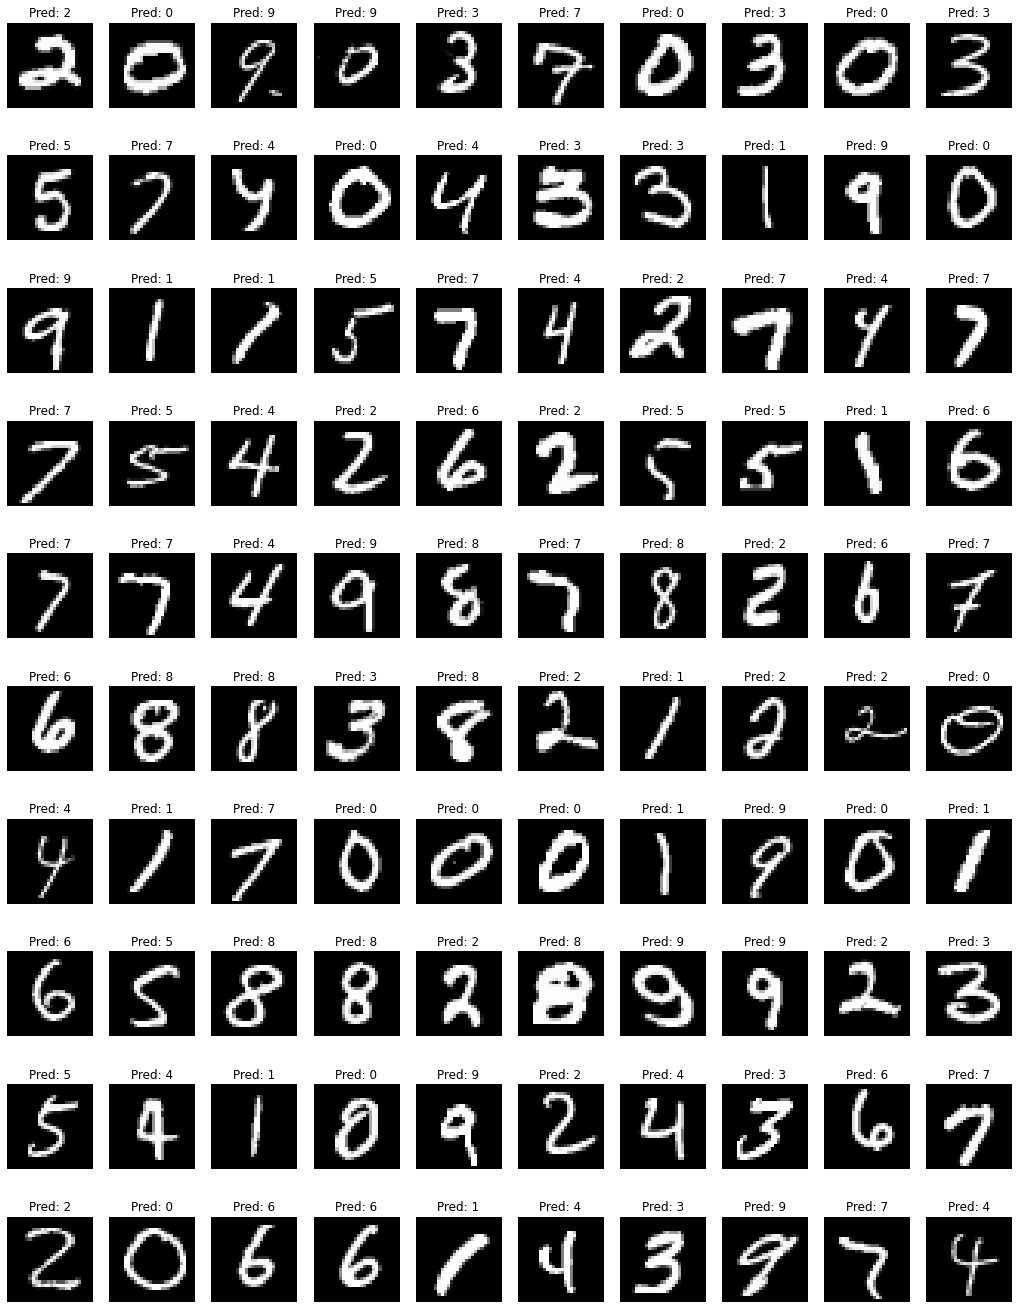

In [38]:
plt.figure(figsize=(18, 24))

for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(X1[i], cmap='gray')
    plt.title(f"Pred: {test_predictions[i]}")
    plt.axis('off')

In [39]:
my_submission = pd.DataFrame({'ImageId': list(range(1, len(test_predictions)+1)), 'Label': test_predictions})
my_submission.to_csv('submission.csv', index=False)

In [41]:
# Saving the model for Future Inferences

model_json = classfier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classfier.save_weights("model.h5")